In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(333)

In [2]:
# Generate some data from an ARMA process

arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])

In [3]:
# The conventions of the arma_generate funciton require that we specify a 1 for teh zero lag of the AR and MA aprameters and that the AR parameters be negated

arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [4]:
# Now optionally we can add some dates information. For this example we will luse a pandas time series


dates = pd.date_range("1980-1-1", freq="M", periods=nobs)
y = pd.Series(y, index=dates)
arma_mod = ARIMA(y, order=(2,0,2), trend='n')
arma_res = arma_mod.fit()

In [5]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -355.527
Date:                Fri, 03 Nov 2023   AIC                            721.053
Time:                        23:21:37   BIC                            738.661
Sample:                    01-31-1980   HQIC                           728.140
                         - 10-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8722      0.169      5.154      0.000       0.540       1.204
ar.L2         -0.2458      0.142     -1.730      0.084      -0.524       0.033
ma.L1          0.5074      0.174      2.924      0.0

In [6]:
y.tail()

2000-06-30   -0.269417
2000-07-31   -0.736774
2000-08-31    0.022971
2000-09-30    0.857215
2000-10-31    0.676487
Freq: M, dtype: float64

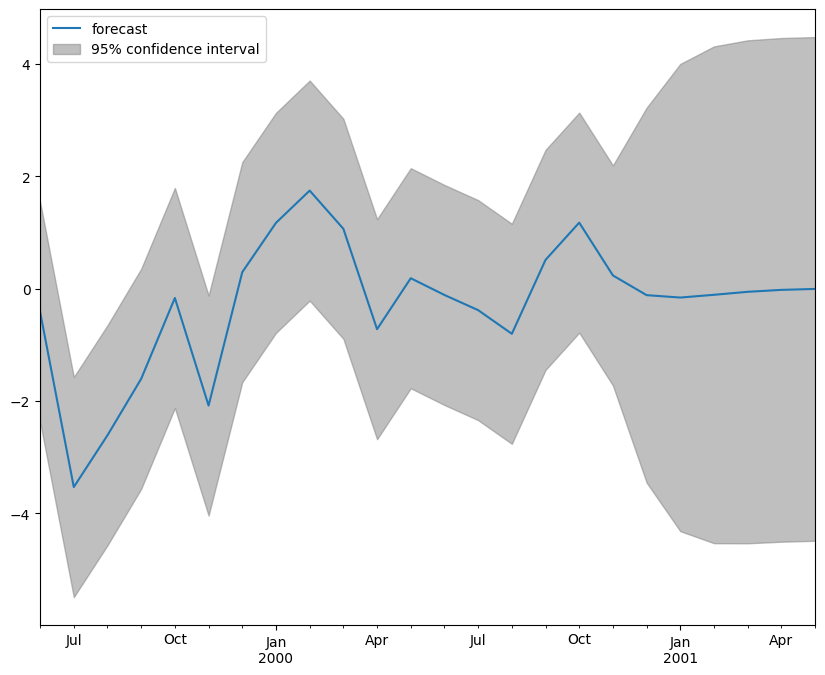

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
fig = plot_predict(arma_res, start="1999-06-30", end="2001-05-31", ax=ax)
legend = ax.legend(loc='upper left')